In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob

### 1. Step: Convert all images to arrays

In [7]:
img_file_names = glob.glob(r'face_images/*.jpg')
# print(img_file_names)

In [24]:
img_file_names = glob.glob(r'face_image_reshaped/*.jpg')
img_data = []

scale = 0.2
img_size = None

for im_name in img_file_names:
    im = Image.open(im_name).convert('L')
    
    thumbnail_size = (im.size[0] * scale, im.size[1] * scale)
    im.thumbnail(thumbnail_size)

    print(thumbnail_size);
    
    im_3D_array = np.array(im)
    img_size = im_3D_array.shape
    im_1D_array = np.ravel(im_3D_array)
    
    img_data.append(im_1D_array)

# print(len(img_data))
img_data = np.array(img_data, dtype=np.uint8).T

(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)
(48.0, 48.0)

KeyboardInterrupt: 

In [13]:
img_data.shape

(2304, 7092)

In [14]:
img_size

(48, 48)

### 2. Step: Compute SVD & plot eigenfaces just for fun

In [15]:
U, S, Vh = np.linalg.svd(img_data)

[-0.0240594  -0.02400353 -0.02399575 ... -0.02035473 -0.02053321
 -0.02081997]


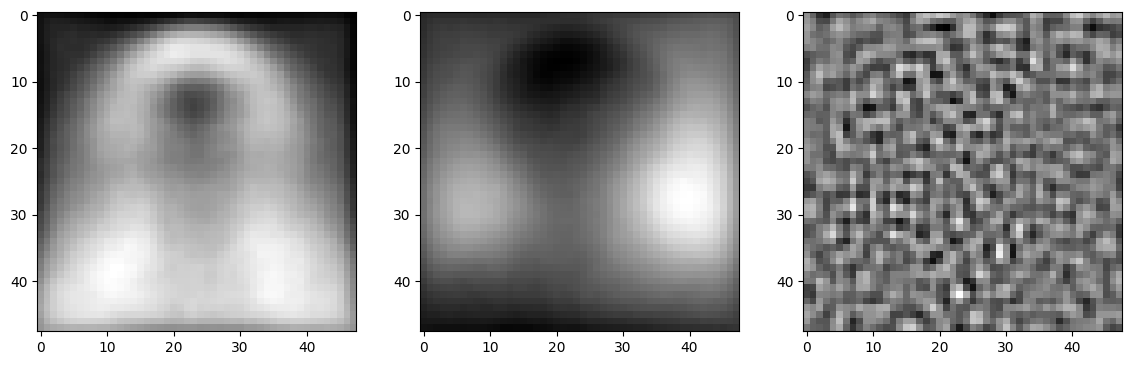

In [16]:
print(U[:, 0])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 22))

ax1.imshow((U[:, 0]).reshape(img_size), cmap='gray')
ax2.imshow((U[:, 4]).reshape(img_size), cmap='gray')
ax3.imshow((U[:, 449]).reshape(img_size), cmap='gray')

### 3. Step: Project faces onto orthogonal subspace and measure similarity (euclidean distance)
$P^TX=Y$

In [17]:
face_proj = U.T @ img_data

In [18]:
def similarity_between_faces(face1, face2, plot=False):
    if plot:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,18))
        ax1.imshow(img_data[:, face1].reshape(img_size), cmap='gray')
        ax2.imshow(img_data[:, face2].reshape(img_size), cmap='gray')
    
    face_diff = face_proj[:, face1] - face_proj[:, face2]
    
    return np.linalg.norm(face_diff)

4653.398113207165

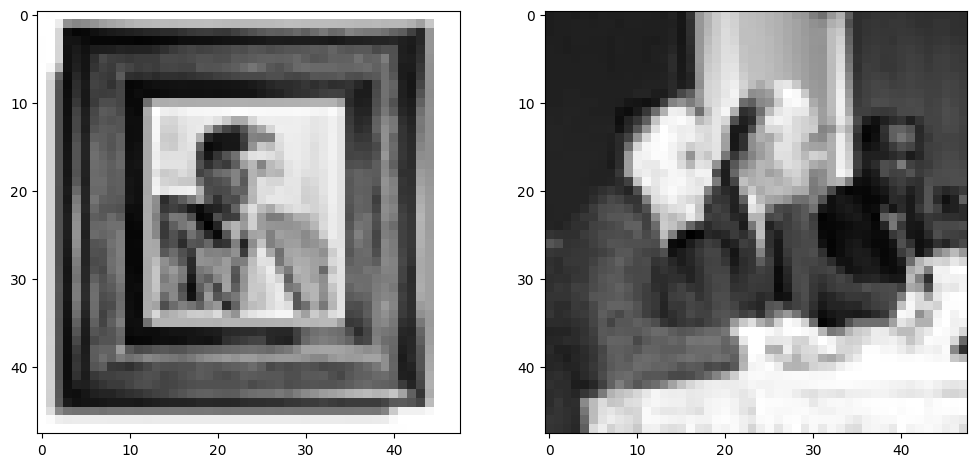

In [19]:
similarity_between_faces(0, 439, plot=True)

In [20]:
# plot 3 most similar faces
def find_3_most_similar_to(face, plot=False):
    best_scores = [9999999, 9999999, 9999999]
    best_face_i = [0, 0, 0]

    for face_i in range(449):
        sim = similarity_between_faces(face, face_i)
        for i, best_sim in enumerate(best_scores):
            if sim < best_sim:
                best_scores[i] = sim
                best_face_i[i] = face_i
                break
    
    plt.imshow(img_data[:, face].reshape(img_size), cmap='gray')
    plt.title('Compare to this')
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 18))
    
    ax1.imshow(img_data[:, best_face_i[0]].reshape(img_size), cmap='gray')
    ax1.set_title("Score: {}".format(int(best_scores[0])))
    
    ax2.imshow(img_data[:, best_face_i[1]].reshape(img_size), cmap='gray')
    ax2.set_title("Score: {}".format(int(best_scores[1])))
    
    ax3.imshow(img_data[:, best_face_i[2]].reshape(img_size), cmap='gray')
    ax3.set_title("Score: {}".format(int(best_scores[2])))
    
    return best_face_i, best_scores

([310, 378, 318], [0.0, 2849.510659744932, 2979.3130080607516])

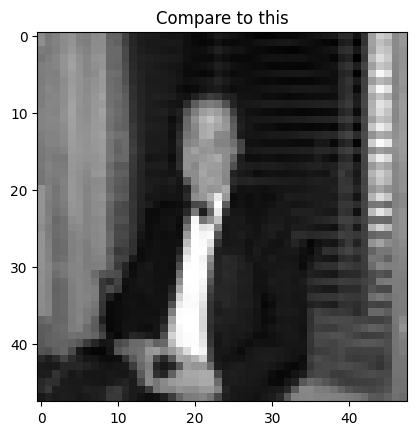

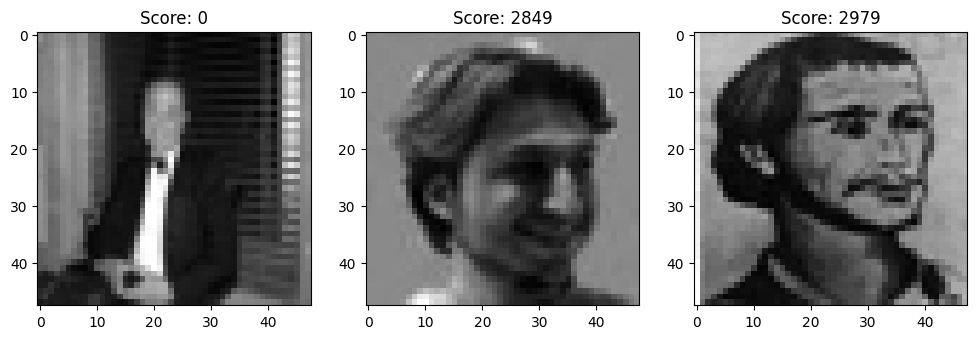

In [21]:
find_3_most_similar_to(310, plot=True)

### 4. Step: Save first 400 principal components

In [22]:
# check how much of the variance is captured by the first 400 P.Cs
np.sum(S[:400]) / np.sum(S)

0.6567665760452337

In [23]:
np.save('principal-components', U[:, :400])